In [9]:
# Power Spectrum plot
import matplotlib.pyplot as plt
import numpy as np
import powerbox as pbox
from Functions import *
from mpl_toolkits import mplot3d
from powerbox import get_power
from scipy import stats
import statistics
import pandas as pd

# Redshift = 0 
#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
fname_in = "imapping_testrun/meraxes.hdf5"
h = meraxes.set_little_h(0.7)
gals, sim_props = meraxes.read_gals(fname_in, snapshot_used, sim_props=True, pandas=False)
#ngals = len(gals)
#print(ngals)
#gals.columns #returns all avaiable properties of galxies
#gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals.dropna()# drop nan values
snaplist = meraxes.io.read_snaplist(fname_in, h)    

# See other available Snaps and Redshifts
reds = snaplist[1]
snaps = snaplist[0]
print(reds)
print(snaps)

# using positions [x,y,x]
Pos = gals["Pos"]
pos_x = Pos[0]
pos_y = Pos[1]
pos_z = Pos[2]
HIMass = gals["HIMass"]

snaplist_index_used_0 = list(snaplist[0]).index(snapshot_used_0)# convert to list and find the index of the snap we are using
redshift_used_0 = snaplist[1][snaplist_index_used_0] # Get the redshift for corresponding snapshot
redshift_used_0 = str(round(redshift_used_0, 1)) # round float to nearest whole int

[4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
[100 115 134 158 173 192 216 250]


In [49]:
pkhi,khi = pbox.get_power(Pos,100,remove_shotnoise=False,N=100,bins=100,weights=HIMass)
pkhi

array([6.56641303e-26, 3.48557753e+03, 1.12896965e+03, 7.24847379e+02,
       3.65719542e+02, 2.44214235e+02, 2.38076079e+02, 1.93290184e+02,
       1.95676200e+02, 1.68067480e+02, 1.35809930e+02, 1.21200011e+02,
       1.22552179e+02, 1.10291080e+02, 1.02330846e+02, 1.03109472e+02,
       9.85572139e+01, 9.02341975e+01, 8.86677944e+01, 8.20950905e+01,
       8.47048149e+01, 7.72143199e+01, 7.89681962e+01, 7.90600572e+01,
       7.38227013e+01, 7.05453391e+01, 7.34870079e+01, 7.12255852e+01,
       6.60700478e+01, 6.74294633e+01, 6.77380142e+01, 6.66273330e+01,
       6.47880745e+01, 6.65803314e+01, 6.50769763e+01, 6.65035918e+01,
       6.48035038e+01, 6.35995012e+01, 6.46793991e+01, 6.43486811e+01,
       6.26643939e+01, 6.40456131e+01, 6.42869492e+01, 6.20260616e+01,
       6.32933531e+01, 6.29148822e+01, 6.24753796e+01, 6.25689213e+01,
       6.20068797e+01, 6.21597140e+01, 6.16837591e+01, 6.21506696e+01,
       6.19711513e+01, 6.21480744e+01, 6.09339037e+01, 6.14127843e+01,
      

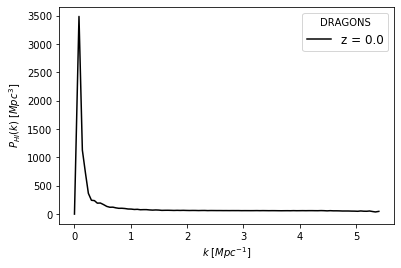

In [50]:
fig, ax = plt.subplots(1, 1)
label_z_0 = ("z = " + redshift_used_0)
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
ax.plot(khi,pkhi,color="black", label=label_z_0)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

name_of_plot=("PowerSpectrum_test")
plt.savefig("plots/" + name_of_plot + ".pdf")